<h1>
    Modules and globals variables
</h2>

In [3]:
import os
import numpy as np
from keras.utils import img_to_array, load_img
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import joblib

# Ścieżki do danych treningowych i testowych
train_path = "./fruits-360/Training"
test_path = "./fruits-360/Test"

saved_train_data_path = "train_data.npy"
saved_test_data_path = "test_data.npy"

saved_train_labels_path = "train_labels.npy"
saved_test_labels_path = "test_labels.npy"

model_path = "./dt.joblib"

# Załaduj dane treningowe
train_data = []
train_labels = []

<h1>
    Load Images
</h1>

In [4]:
# Funkcja do usunięcia numeracji z nazwy klasy
def remove_number(label):
    return ''.join([i for i in label if not i.isdigit()])

# Funkcja do ładowania danych z paskiem postępu ogólnego
def load_data_from_path(path, save_data_path, save_labels_path):
    if os.path.exists(save_data_path) and os.path.exists(save_labels_path):
        # Odczytaj dane z plików .npy
        data = np.load(save_data_path)
        labels = np.load(save_labels_path)
    else:
        data = []
        labels = []
        total_files = sum([len(files) for _, _, files in os.walk(path)])
        progress_bar = tqdm(total=total_files, unit="img", desc="Global Progress")

        # Iteracja po folderach klas i załadowanie obrazów
        for class_name in os.listdir(path):
            class_path = os.path.join(path, class_name)
            progress_bar.set_postfix_str(f"Current Class: {class_name}")
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = load_img(img_path, target_size=(100, 100))
                img_array = img_to_array(img)

                # Usuwanie numeracji z nazw klas
                base_label = remove_number(class_name)

                data.append(img_array.flatten())
                labels.append(base_label)

                progress_bar.update(1) 

        progress_bar.close() 

        # Zapisywanie plików
        np.save(save_data_path, data)
        np.save(save_labels_path, labels)

    return data, labels

# Załaduj dane treningowe
train_data, train_labels = load_data_from_path(train_path, saved_train_data_path, saved_train_labels_path)

# Załaduj dane testowe
test_data, test_labels = load_data_from_path(test_path, saved_test_data_path, saved_test_labels_path)

In [5]:

unique_labels = set(test_labels)
print(len(unique_labels))
print(unique_labels)

118
{'Chestnut', 'Melon Piel de Sapo', 'Apple Red ', 'Avocado', 'Mango Red', 'Corn', 'Corn Husk', 'Physalis', 'Huckleberry', 'Orange', 'Potato White', 'Pepper Green', 'Pear Monster', 'Redcurrant', 'Pear Stone', 'Physalis with Husk', 'Pitahaya Red', 'Tomato Yellow', 'Grapefruit Pink', 'Plum ', 'Lychee', 'Pear Red', 'Mango', 'Mangostan', 'Mulberry', 'Quince', 'Pear Forelle', 'Pepper Red', 'Nectarine', 'Strawberry', 'Pineapple', 'Kohlrabi', 'Tomato not Ripened', 'Cherry Rainier', 'Pomegranate', 'Grape Pink', 'Strawberry Wedge', 'Banana', 'Granadilla', 'Grape White ', 'Pear ', 'Grape Blue', 'Tomato ', 'Kiwi', 'Banana Lady Finger', 'Cucumber Ripe ', 'Papaya', 'Pepper Yellow', 'Nectarine Flat', 'Tangelo', 'Pepino', 'Pear', 'Cherry Wax Red', 'Apple Pink Lady', 'Clementine', 'Avocado ripe', 'Dates', 'Apple Red Yellow ', 'Apple Granny Smith', 'Beetroot', 'Grapefruit White', 'Onion White', 'Watermelon', 'Apple Braeburn', 'Tomato Heart', 'Peach', 'Hazelnut', 'Banana Red', 'Pear Williams', 'Aprico

Drzewo decyzyjne

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib
import os
import numpy as np

# Konwersja na numpy array
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Podział danych na zbiór treningowy i testowy
print("Podział danych na zbiór treningowy i testowy")
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=64)

model_path = "decision_tree_model.joblib"

# Sprawdź, czy plik z modelem istnieje
if os.path.exists(model_path):
    # Wczytaj istniejący model
    tree_clf = joblib.load(model_path)
    print("Wczytano istniejący model drzewa decyzyjnego.")
else:
    # Inicjalizacja i trenowanie modelu drzewa decyzyjnego
    tree_clf = DecisionTreeClassifier(random_state=42)

    print("Trenowanie modelu drzewa decyzyjnego...")
    tree_clf.fit(X_train, y_train)
    
    # Zapisz model do pliku
    joblib.dump(tree_clf, model_path)
    print("Model drzewa decyzyjnego został zapisany do pliku.")

# Predykcja na zbiorze testowym
print("Predykcja na zbiorze testowym...")
y_pred_tree = tree_clf.predict(X_test)

# Dokładność modelu
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Dokładność modelu drzewa decyzyjnego: {:.2%}".format(accuracy_tree))

# Testowanie na danych testowych
print("Testowanie na danych testowych...")
test_accuracy_tree = accuracy_score(test_labels, tree_clf.predict(test_data))
print("Dokładność modelu drzewa decyzyjnego na danych testowych: {:.2%}".format(test_accuracy_tree))


Podział danych na zbiór treningowy i testowy
Wczytano istniejący model drzewa decyzyjnego.
Predykcja na zbiorze testowym...
Dokładność modelu drzewa decyzyjnego: 91.86%
Testowanie na danych testowych...
Dokładność modelu drzewa decyzyjnego na danych testowych: 71.79%


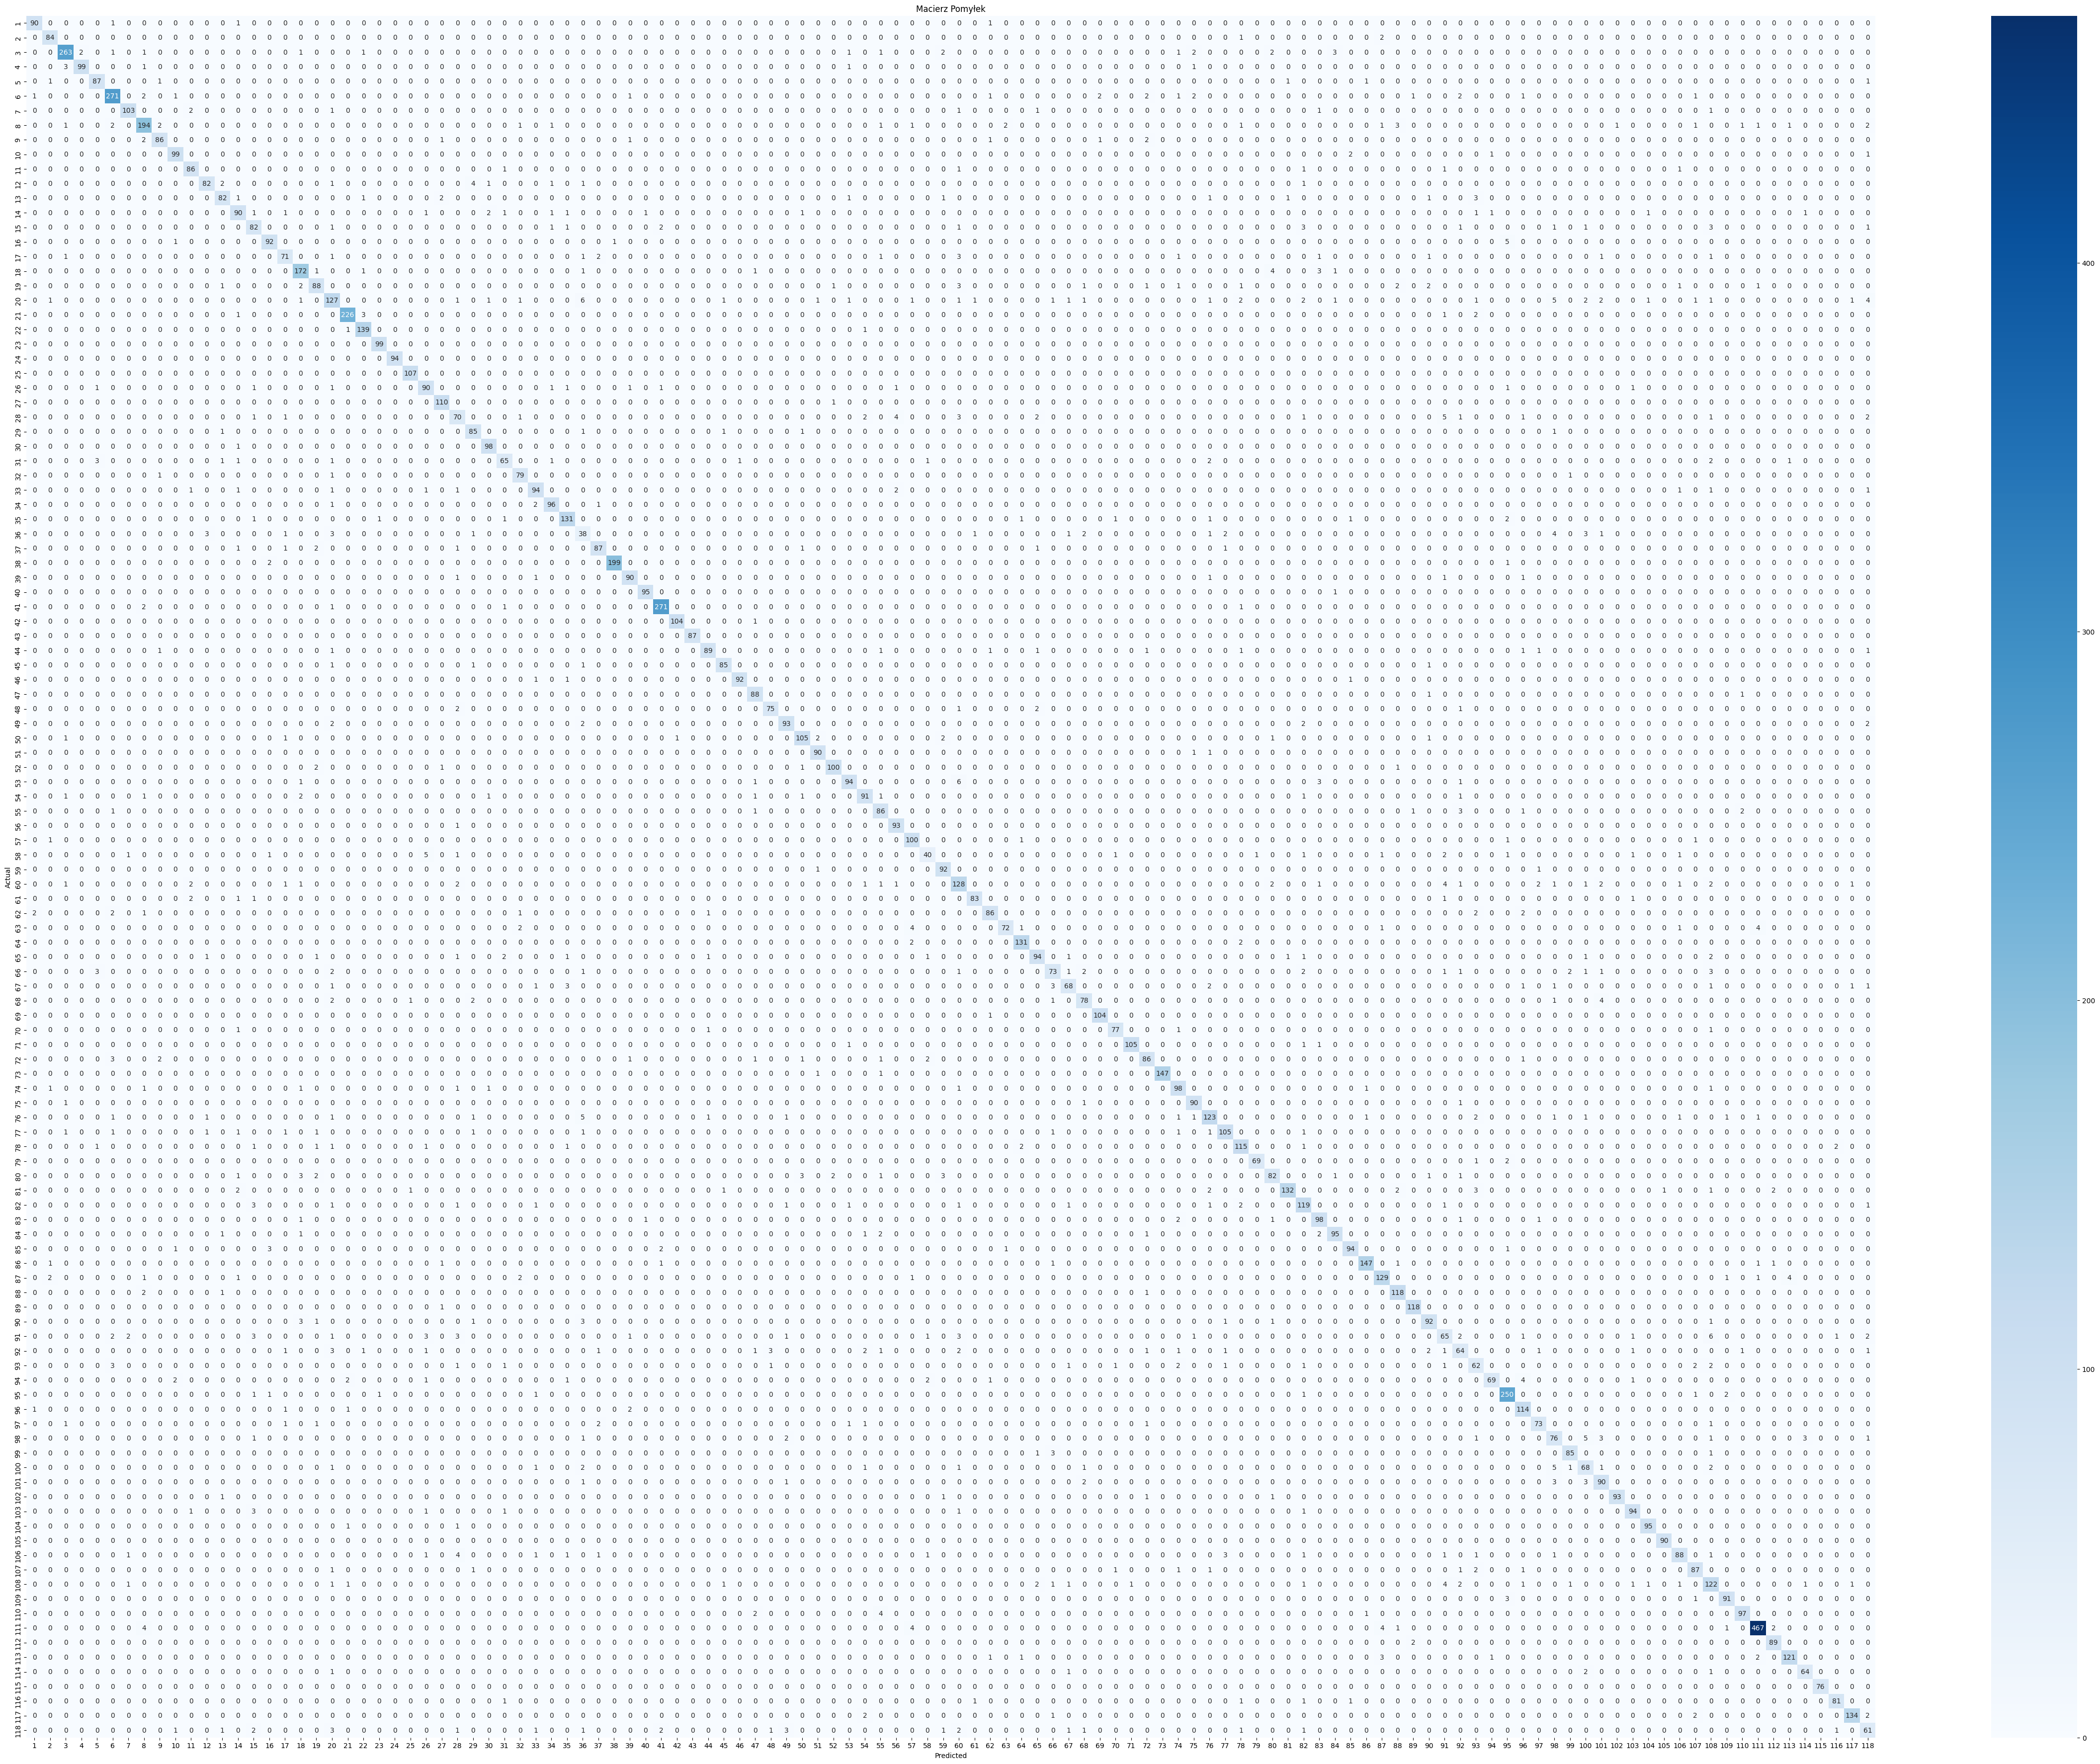

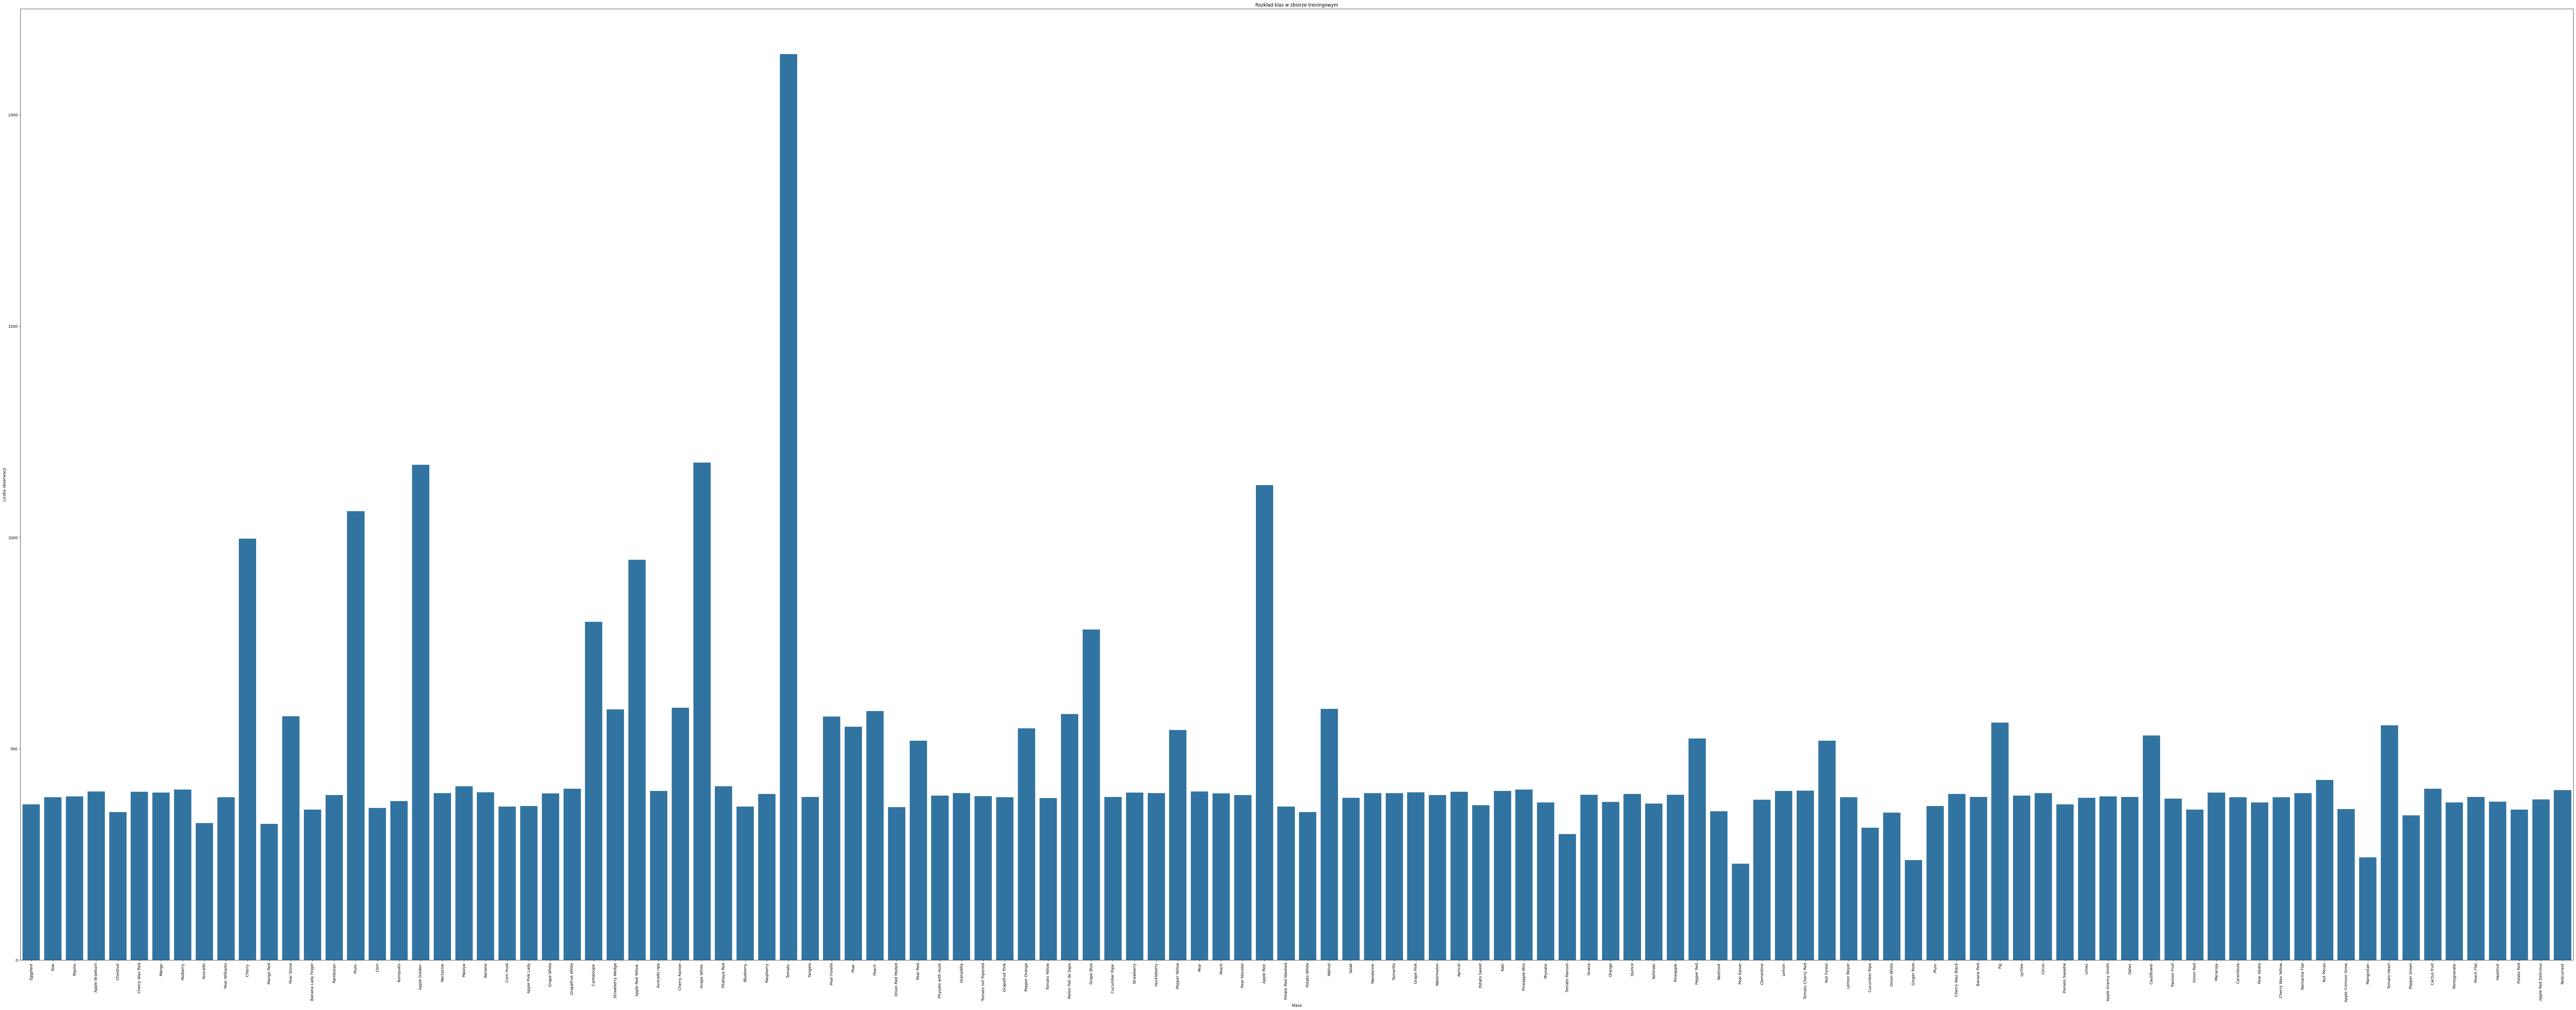

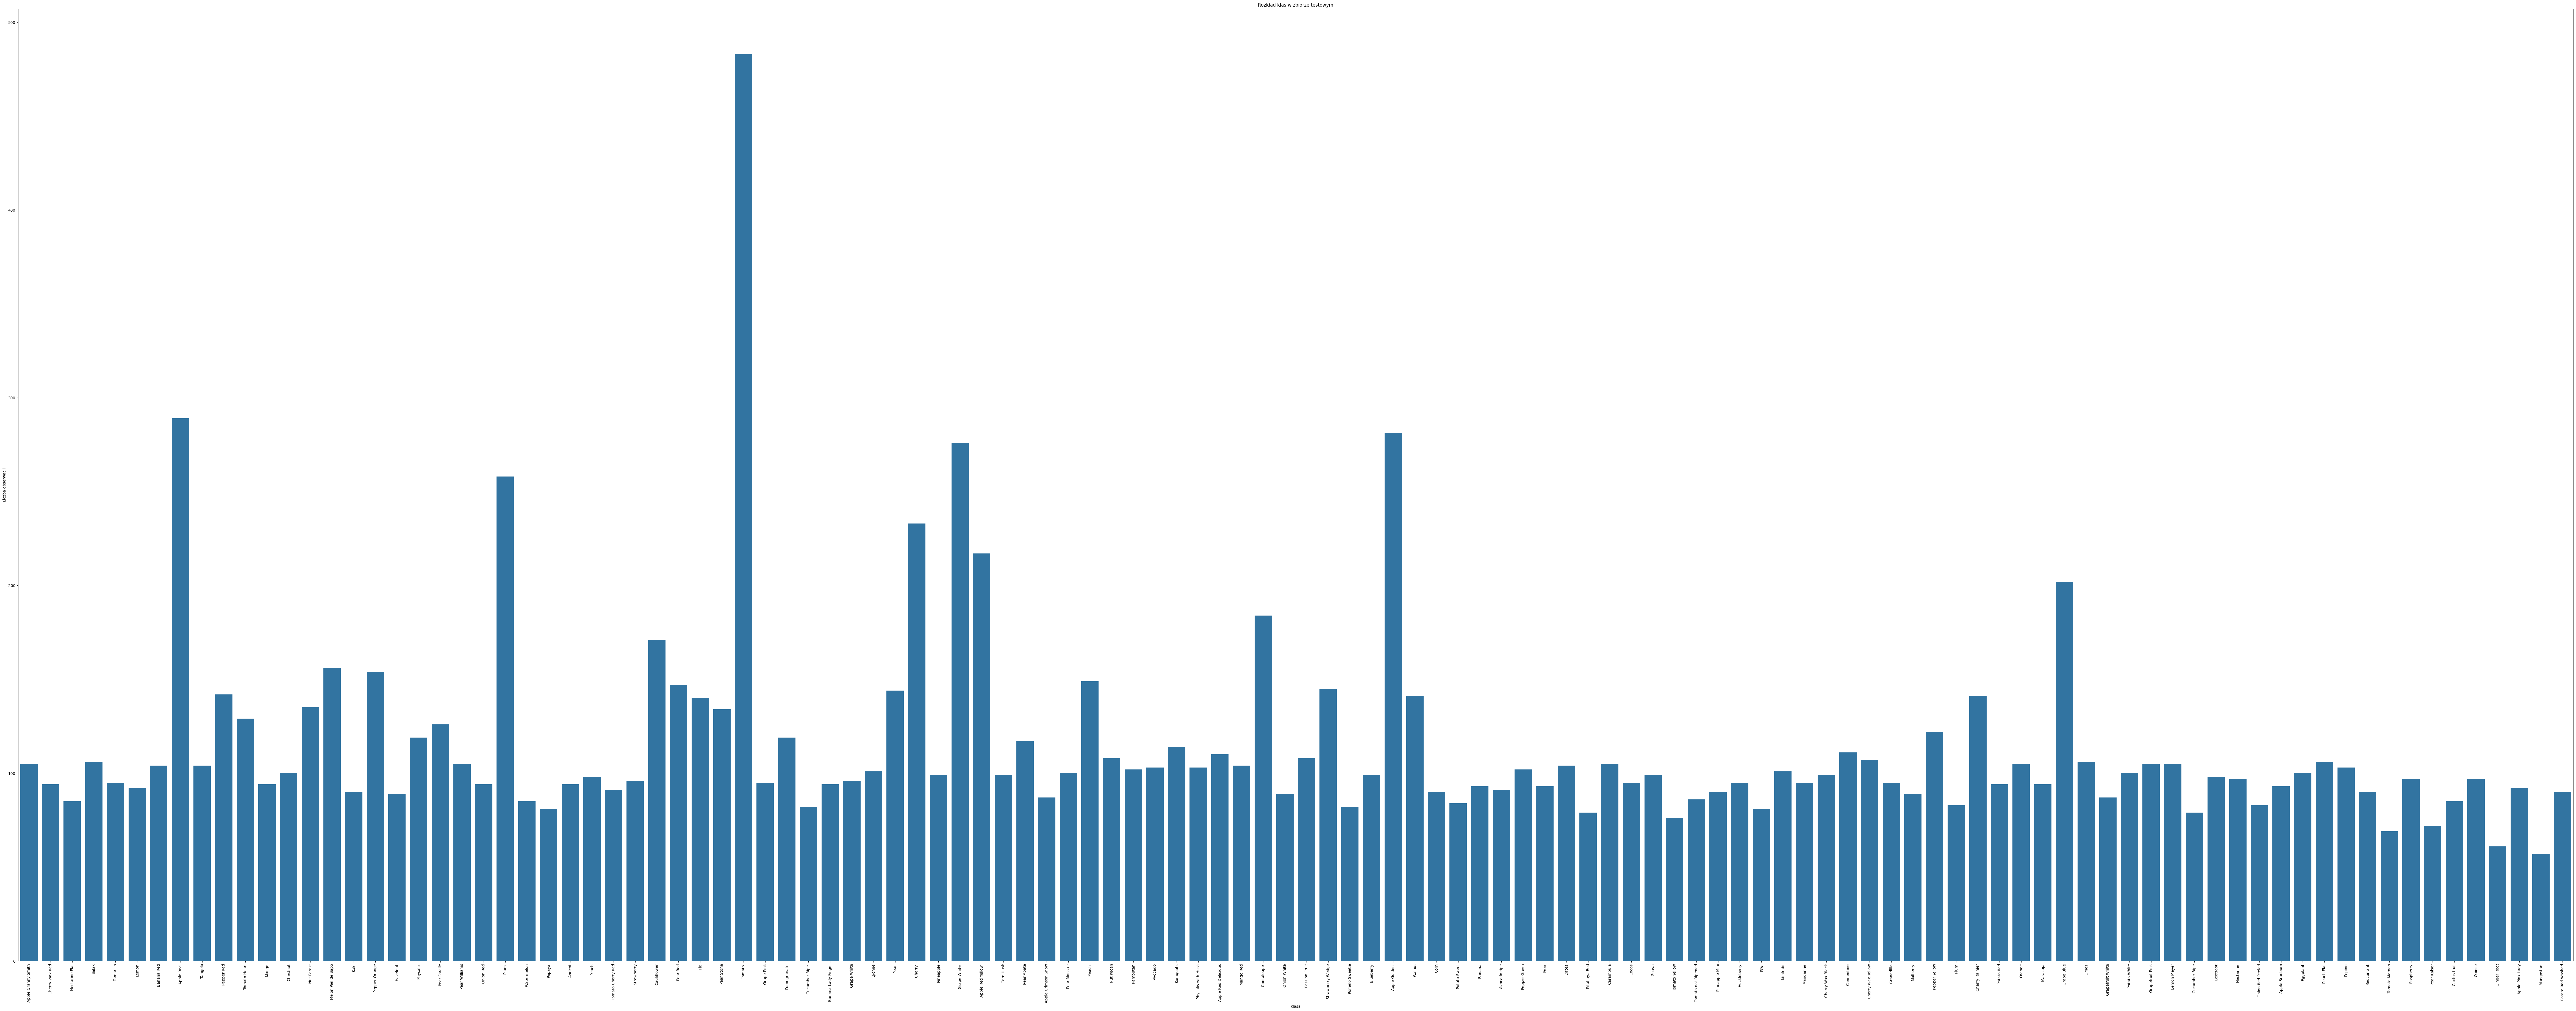

Raport klasyfikacji:
                      precision    recall  f1-score   support

     Apple Braeburn       0.96      0.97      0.96        93
 Apple Crimson Snow       0.92      0.97      0.94        87
      Apple Golden        0.96      0.94      0.95       281
 Apple Granny Smith       0.98      0.94      0.96       105
    Apple Pink Lady       0.92      0.95      0.93        92
         Apple Red        0.94      0.94      0.94       289
Apple Red Delicious       0.95      0.94      0.94       110
  Apple Red Yellow        0.92      0.89      0.90       217
            Apricot       0.92      0.91      0.92        94
            Avocado       0.94      0.96      0.95       103
       Avocado ripe       0.91      0.95      0.93        91
             Banana       0.93      0.88      0.91        93
 Banana Lady Finger       0.90      0.87      0.89        94
         Banana Red       0.87      0.87      0.87       104
           Beetroot       0.81      0.84      0.82        98
 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Wizualizacja macierzy pomyłek
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(60, 45))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 119), yticklabels=range(1, 119))
plt.title('Macierz Pomyłek')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Wykres rozkładu klas w zbiorze treningowym
plt.figure(figsize=(120, 45))
sns.countplot(x=y_train)
plt.title('Rozkład klas w zbiorze treningowym')
plt.xlabel('Klasa')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation='vertical')
plt.show()

# Wykres rozkładu klas w zbiorze testowym
plt.figure(figsize=(120, 45))
sns.countplot(x=y_test)
plt.title('Rozkład klas w zbiorze testowym')
plt.xlabel('Klasa')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation='vertical')
plt.show()

# Raport klasyfikacji
classification_rep = classification_report(y_test, y_pred_tree)
print("Raport klasyfikacji:\n", classification_rep)
